In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("../ArchGarchDatasets/RelianceIndustries.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,2353.649170,2380.416260,2351.987793,2377.554932,2369.185791,2658087
1,2023-01-03,2367.540283,2374.878174,2351.618652,2360.156250,2351.848389,3829466
2,2023-01-04,2360.110107,2363.848389,2320.421143,2324.620850,2316.438232,4632445
3,2023-01-05,2329.189697,2341.096436,2311.191162,2320.467285,2312.299316,6818549
4,2023-01-06,2332.097168,2351.757080,2324.390137,2341.557861,2333.315430,3174798
...,...,...,...,...,...,...,...
260,2024-01-23,2743.500000,2743.500000,2645.100098,2657.149902,2657.149902,10027710
261,2024-01-24,2670.449951,2699.000000,2647.850098,2687.750000,2687.750000,10959564
262,2024-01-25,2685.899902,2728.300049,2670.399902,2706.149902,2706.149902,5904436
263,2024-01-29,2729.000000,2905.000000,2720.350098,2896.100098,2896.100098,11946719


In [2]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


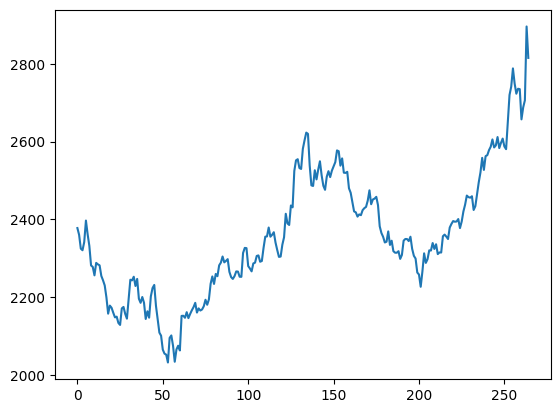

In [3]:
plt.plot(df['Close'])


In [15]:
returns =df['Close'].pct_change().dropna()

df['Daily_Returns'] = df['Close'].pct_change()
df


,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
0,2023-01-02,2353.649170,2380.416260,2351.987793,2377.554932,2369.185791,2658087,NaN
1,2023-01-03,2367.540283,2374.878174,2351.618652,2360.156250,2351.848389,3829466,-0.007318
2,2023-01-04,2360.110107,2363.848389,2320.421143,2324.620850,2316.438232,4632445,-0.015056
3,2023-01-05,2329.189697,2341.096436,2311.191162,2320.467285,2312.299316,6818549,-0.001787
4,2023-01-06,2332.097168,2351.757080,2324.390137,2341.557861,2333.315430,3174798,0.009089
...,...,...,...,...,...,...,...,...
260,2024-01-23,2743.500000,2743.500000,2645.100098,2657.149902,2657.149902,10027710,-0.028429
261,2024-01-24,2670.449951,2699.000000,2647.850098,2687.750000,2687.750000,10959564,0.011516
262,2024-01-25,2685.899902,2728.300049,2670.399902,2706.149902,2706.149902,5904436,0.006846
263,2024-01-29,2729.000000,2905.000000,2720.350098,2896.100098,2896.100098,11946719,0.070192


In [5]:
print(df.isnull().sum())

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Daily_Returns    1
dtype: int64


In [26]:
df.dropna(inplace=True)
returns.dropna(inplace=True)
df
returns


1     -0.007318
2     -0.015056
3     -0.001787
4      0.009089
5      0.023611
         ...   
260   -0.028429
261    0.011516
262    0.006846
263    0.070192
264   -0.027917
Name: Close, Length: 264, dtype: float64

In [27]:
from arch import arch_model


In [28]:
garch_model = arch_model(df['Daily_Returns'], vol='GARCH', p=1, q=1)
garch_results = garch_model.fit()
print(garch_results)



Iteration:      1,   Func. Count:      6,   Neg. LLF: 152706044504.90222
Iteration:      2,   Func. Count:     18,   Neg. LLF: 339162608.8092176
Optimization terminated successfully    (Exit mode 0)
            Current function value: -798.6483135274151
            Iterations: 2
            Function evaluations: 27
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Daily_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                798.648
Distribution:                  Normal   AIC:                          -1589.30
Method:            Maximum Likelihood   BIC:                          -1574.99
                                        No. Observations:                  264
Date:                Fri, Feb 23 2024   Df Residuals:                      263
Time:          

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [29]:
forecast = garch_results.forecast(horizon=1)




In [30]:
print("GARCH(1,1) Model Parameters:")
print(garch_results.params)

print("\nForecasted Conditional Variance for the next 1 day:")
print(forecast.variance.iloc[-1])

GARCH(1,1) Model Parameters:
mu          0.000907
omega       0.000015
alpha[1]    0.100000
beta[1]     0.800000
Name: params, dtype: float64

Forecasted Conditional Variance for the next 1 day:
h.1    0.000605
Name: 264, dtype: float64


In [38]:
best_aic = np.inf  # Initialize with a very large value
best_order = None

# Loop over potential values of p and q
for p in range(1, 6):  # Maximum lag order for ARCH model
    for q in range(1, 6):  # Maximum lag order for GARCH model
        # Fit ARCH/GARCH model with current p and q values
        model = arch_model(returns, vol='Garch', p=p, q=q)
        result = model.fit(disp='off')  # Suppress output for simplicity
        
        # Calculate AIC
        aic = result.aic
        
        # Check if current AIC is the best so far
        if aic < best_aic:
            best_aic = aic
            best_order = (p, q)
            p_value=p
            q_value=q

print("Best AIC:", best_aic)
print("Best Order (p, q):", best_order)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310

Best AIC: -1592.7160203968256
Best Order (p, q): (2, 1)
2 1


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [36]:
model = arch_model(returns, vol='Garch', p=2, q=1)
result = model.fit(disp='off')
print(result)


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                801.358
Distribution:                  Normal   AIC:                          -1592.72
Method:            Maximum Likelihood   BIC:                          -1574.84
                                        No. Observations:                  264
Date:                Fri, Feb 23 2024   Df Residuals:                      263
Time:                        11:22:24   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.0670e-03  7.564e-04      1.411      0.158 

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [37]:
forecast = result.forecast(horizon=1)
forecast_volatility = np.sqrt(forecast.variance.iloc[-1])
print(forecast_volatility);

h.1    0.030008
Name: 264, dtype: float64
